# 1. Setup

## 1.1 Install Dependencies

In [12]:
%%capture var_that_contains_the_cell_output
import os
os.sys.path  # this is to know where the kernel is looking for packages

In [13]:
var_that_contains_the_cell_output.stdout

''

## 1.2 Import Dependencies

In [4]:
# Import standard dependencies
import tensorflow as tf   # ( heaviest of them all ; No need to run this cell when you are not working with tensorflow )

In [4]:
import random
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [2]:
import cv2

In [4]:
# use this to know if eerything is imported correctly

print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.16.1
OpenCV version: 4.9.0


In [ ]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model 

# Many types of layers :- Dense ( all neurons have acccess to ALL other neurons of the previous layer ) ; Con2D for IP 
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

# Three most important things :- Model, Layer, Input
# Model(input=[input_image, verificaiton_image],output=[1,0]) <-- kinda how it works
# Input(shape=...)
# Flatten :- flattens the data from a CONVOLUTIONAL NN to a Dense Layer

## 1.3 Set GPU Growth

In [7]:
# You need to start using WSL2 for All DL projects if you want to use GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [8]:
# By default tensor_flow expands to take entire VRAM := which can lead to out of memory (OOM) error 
# We impose a growth rate restriction on TensorFlow


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [19]:
# Get current working directory
os.getcwd()

'D:\\Code Practise\\Exploring__Open_CV__\\FaceRecognition'

In [10]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [18]:
POS_PATH

'data\\positive'

In [16]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# data
#   |----- positive
#   |----- negetive
#   |----- anchor

# 2. Collect Positives and Anchors

- Anchor Image ----> WebCam
- Positive Image --> WebCam US
- Negative Image --> LWF ( List of Wild Face )  Dataset

## 2.1 Untar Labelled Faces in the Wild Dataset

> I was able to have the path to be TAB completed while doing the `tar -xf`

In [3]:
! tar -xf lfw.tgz  

In [17]:
%%capture 
os.listdir('lfw')

In [18]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [12]:
# you could get cv2.cvtColor cpp error => you are accessing the wrong webcam
cap = cv2.VideoCapture(0)

while cap.isOpened(): 
    
    # frame is the image, ret is wheather success or not
    ret, frame = cap.read()

    # displaying frame
    cv2.imshow('Image Collection', frame)

    # Quit on pressing Q to exit gracefully ; No need of KeyboardInterrupt
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# THIS IS WHAT YOU NEED TO EXECUTE when something goes wrong

# releases the webcame
cap.release()
# releases the image show frame
cv2.destroyAllWindows()

In [9]:
frame # it is JUST A NUMPY array !!!!!

array([[[ 63, 122, 112],
        [ 63, 122, 112],
        [ 64, 123, 116],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 253, 255]],

       [[ 69, 130, 121],
        [ 66, 126, 118],
        [ 64, 125, 119],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 253, 255]],

       [[ 64, 125, 121],
        [ 60, 121, 117],
        [ 54, 117, 115],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 253, 255]],

       ...,

       [[ 83, 103, 111],
        [ 83, 102, 109],
        [ 85, 103, 110],
        ...,
        [105, 127, 155],
        [105, 127, 155],
        [105, 127, 155]],

       [[ 89, 104, 120],
        [ 86, 101, 117],
        [ 87, 101, 116],
        ...,
        [102, 124, 152],
        [102, 125, 153],
        [103, 126, 154]],

       [[ 93, 106, 128],
        [ 89, 101, 123],
        [ 89, 100, 121],
        ...,
        [ 99, 122, 150],
        [ 99, 123, 151],
        [ 98, 124, 151]]

In [11]:
# So my webcam by defaults gives 480x640 pixel image
frame.shape  

(480, 640, 3)

In [15]:
new_frame = frame[:250, :250, : ] 
new_frame.shape  # frame[0:250, 0:250, : ].shape

(250, 250, 3)

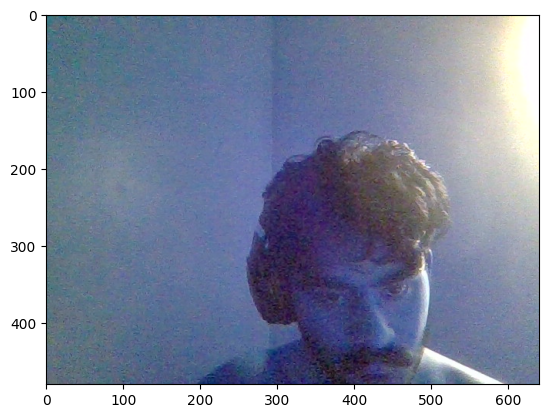

In [8]:
plt.imshow(frame) 

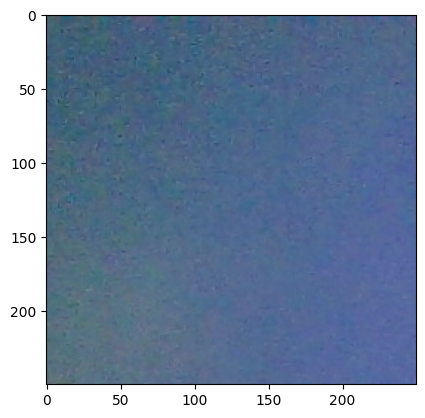

In [16]:
plt.imshow(new_frame) # essentially, just the TOP LEFT CORNER ; so we tweek this till it can reach our face

In [ ]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
plt.imshow(frame[120:120+250,200:200+250, :])

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

## 3.2 Preprocessing - Scale and Resize

# 3.3 Create Labelled Dataset

# 3.4 Build Train and Test Partition

# 4. Model Engineering

## 4.1 Build Embedding Layer

## 4.2 Build Distance Layer

## 4.3 Make Siamese Model

# 5. Training

## 5.1 Setup Loss and Optimizer

## 5.2 Establish Checkpoints

## 5.3 Build Train Step Function

## 5.4 Build Training Loop

## 5.5 Train the model

# 6. Evaluate Model

# 7. Save Model

# 8. Real Time Test